In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}")
print(f"Categories in 'race_ethincity' variable: {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental level of education' variable: {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"Categories in 'test_preparation_course' variable: {df['test_preparation_course'].unique()}")


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethincity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [11]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# Print columns
print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['reading_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in math: {math_less_20}")


Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 1
Number of students with less than 20 marks in math: 4


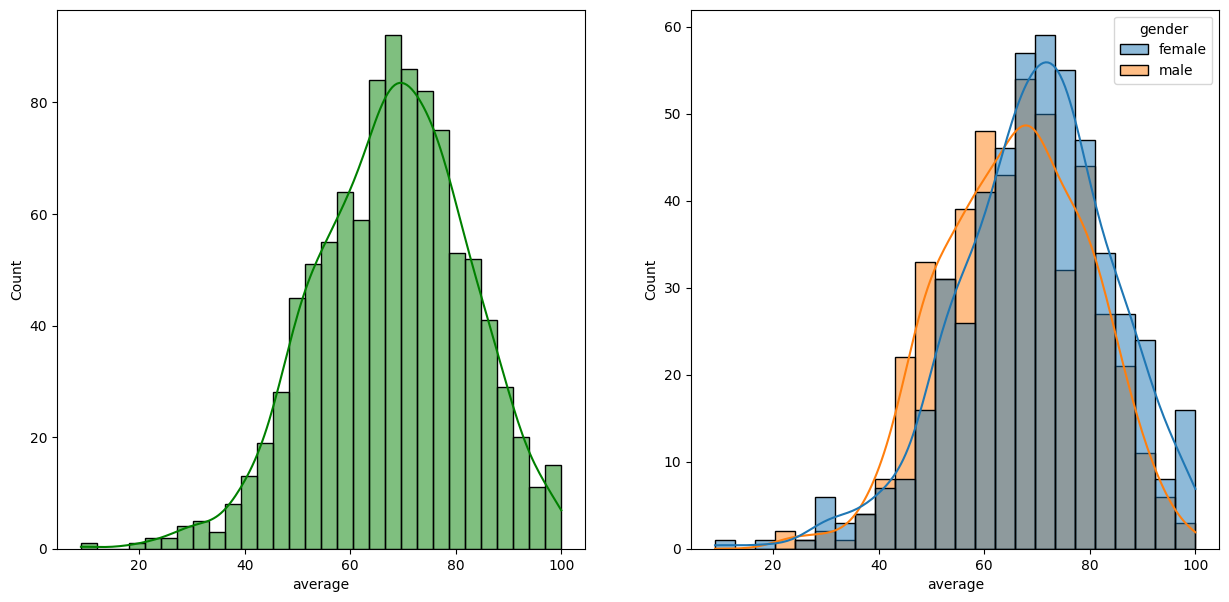

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

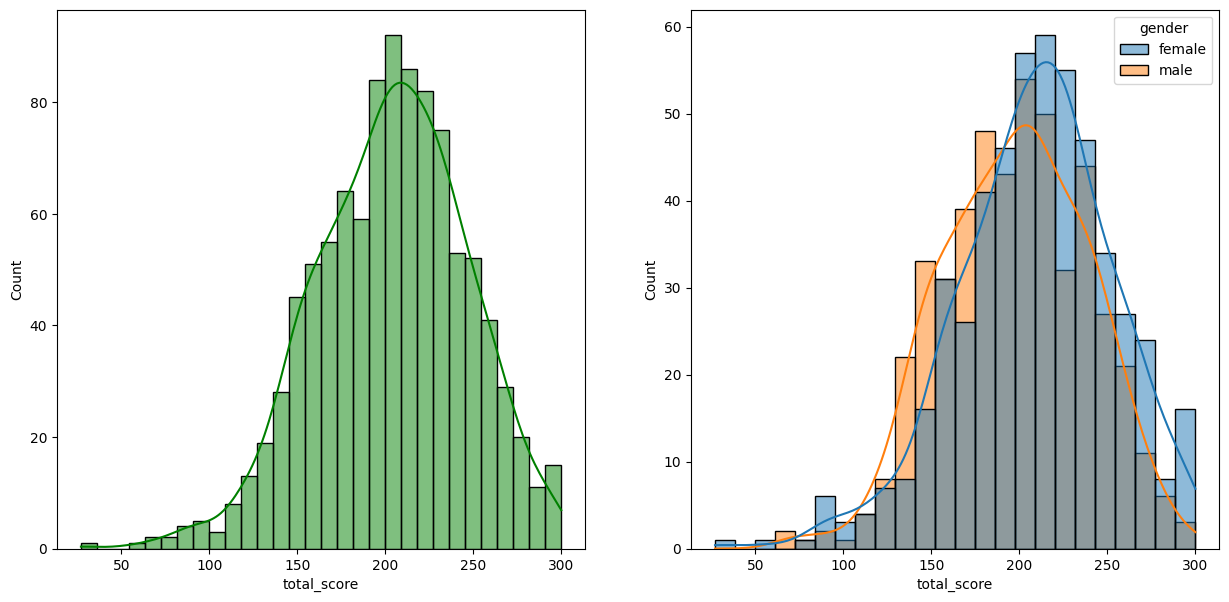

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

**Insights**
- Female students tend to perform well then male students.

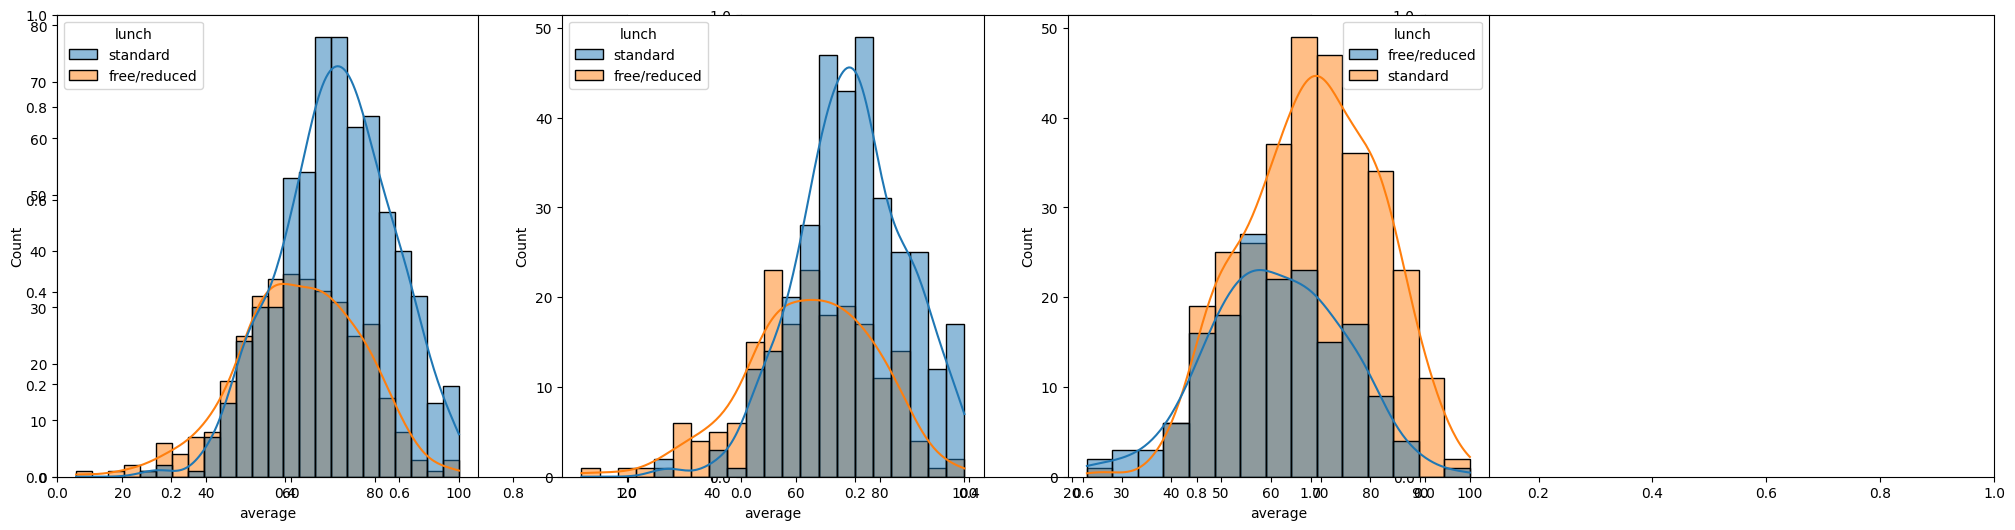

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or female.

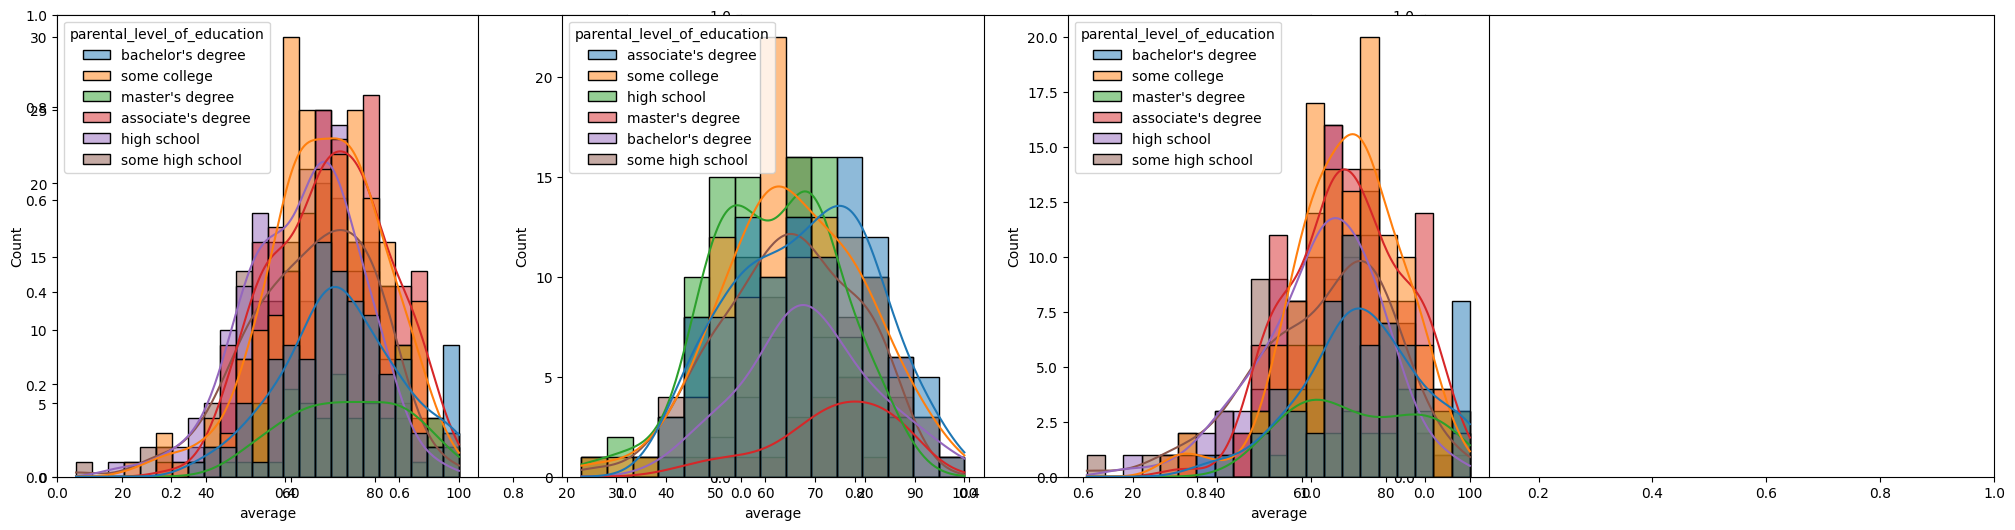

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [20]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

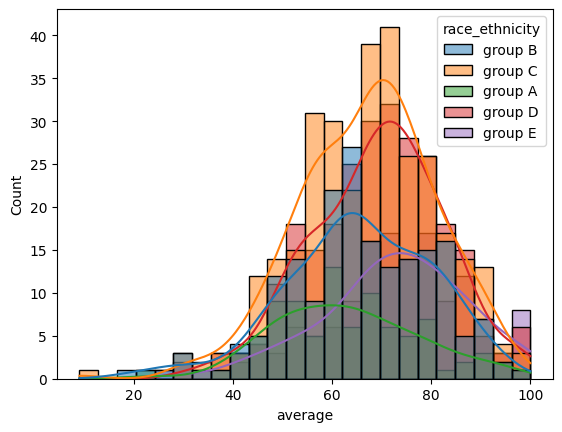

In [21]:
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.show()

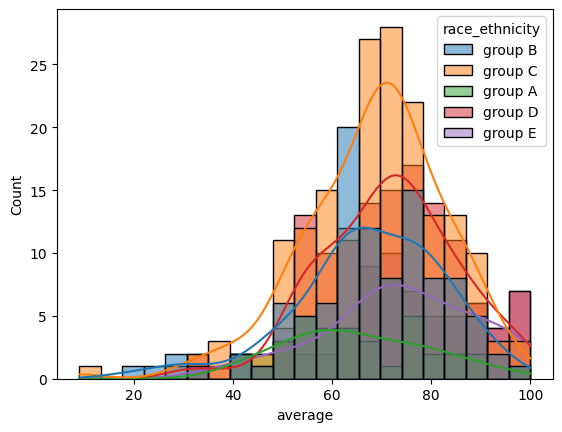

In [22]:
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.show()

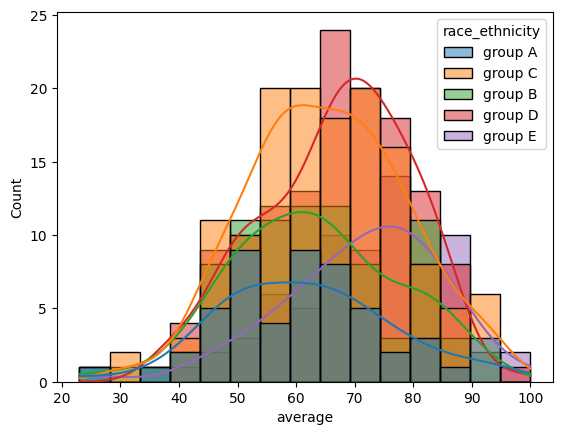

In [23]:
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: title={'center': 'Math Scores'}, ylabel='math_score'>

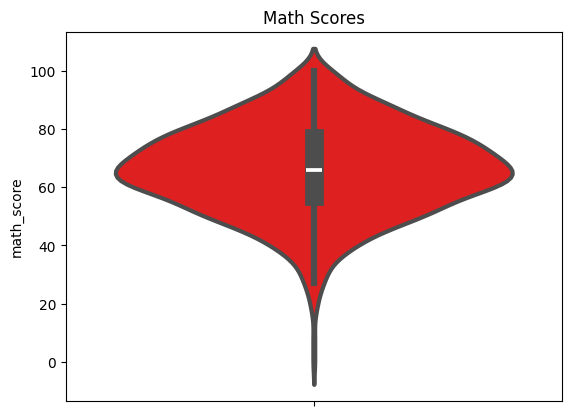

In [24]:
plt.title("Math Scores")
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

<Axes: title={'center': 'Reading Scores'}, ylabel='reading_score'>

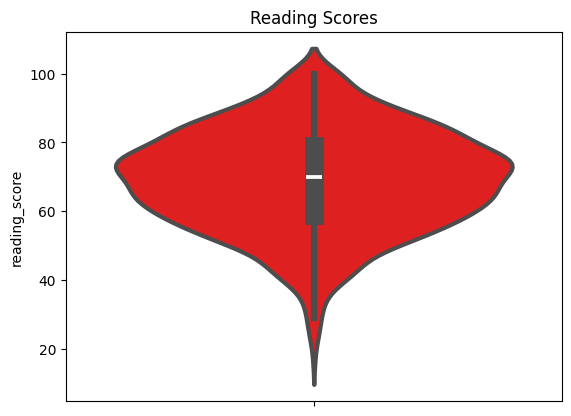

In [25]:
plt.title("Reading Scores")
sns.violinplot(y='reading_score', data=df, color='red', linewidth=3)

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

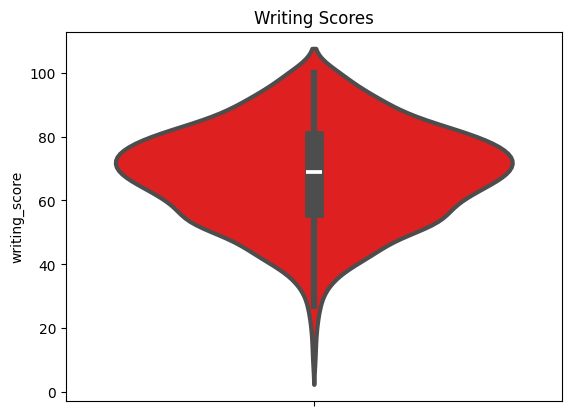

In [26]:
plt.title("Writing Scores")
sns.violinplot(y='writing_score', data=df, color='red', linewidth=3)

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths wheres in reading and writing most of them score from 50-80

In [27]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

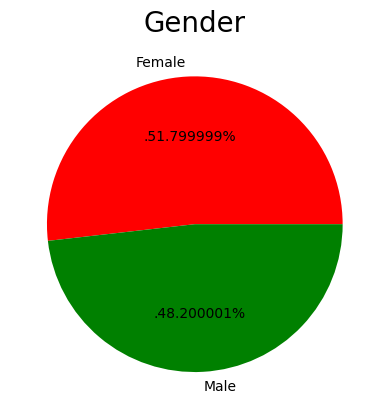

In [28]:
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")

In [30]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

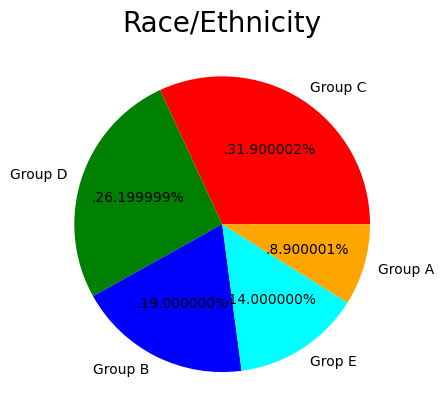

In [32]:
size = df['race_ethnicity'].value_counts()
labels = "Group C", "Group D", "Group B", "Grop E", "Group A"
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Race/Ethnicity", fontsize=20)
plt.axis('off')
plt.show()

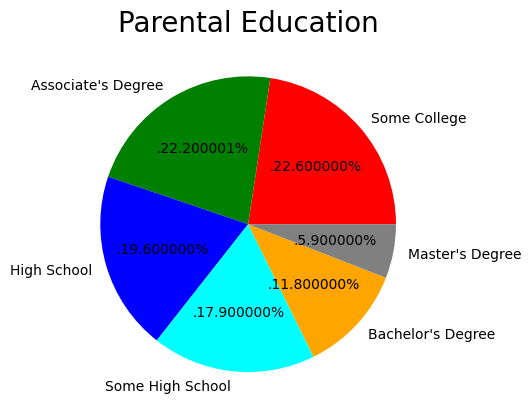

In [33]:
size = df['parental_level_of_education'].value_counts()
labels = "Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Parental Education", fontsize=20)
plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation cource is greater.
- Number of students whose parental education is "Some College" is greater followed colsely by "Associate's Degree"

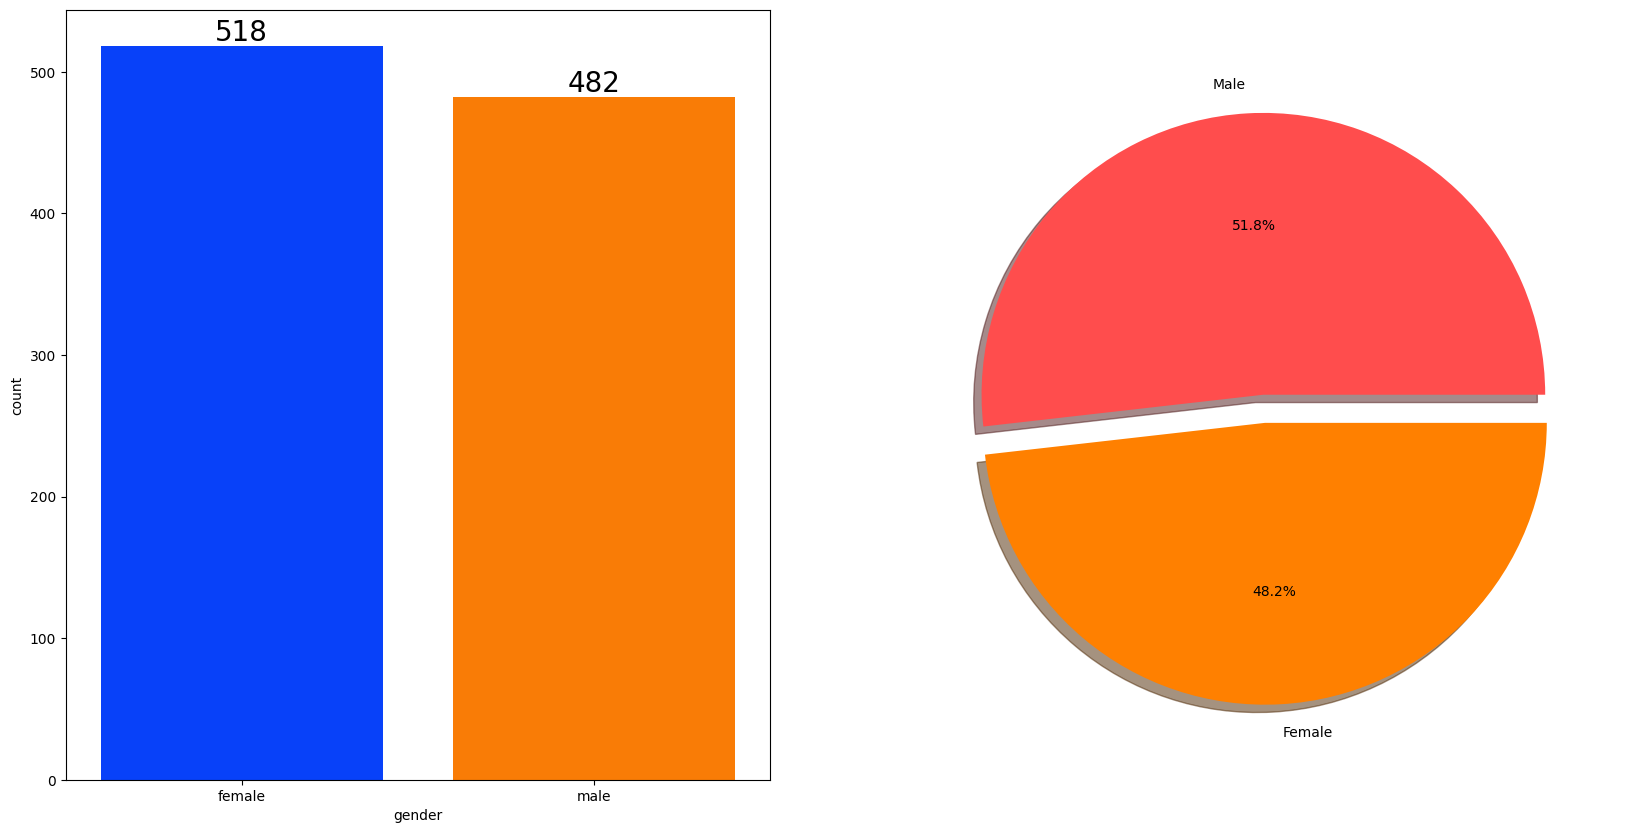

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [36]:
df['gender'].value_counts(normalize=True) * 100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

**Insights**
- Gender has balanced data with female students are 52% and male students are 48%

In [37]:
gender_grop = df.groupby('gender').mean()
gender_grop

TypeError: agg function failed [how->mean,dtype->object]

**Conclusions**
- Student's Performance is related with lunch, race, parental level of education
- Females lead in pass percentage and also are top scorers
- Student's Performance is not much related with test preparation course
- Finishing prepartion course is benefitial.